In [77]:
import torch  
import torch.nn as nn  
import torch.nn.functional as fn  
from torchvision import datasets  
from torchvision import transforms  
import matplotlib
import matplotlib.pyplot as plt 

from pathlib import Path


device = 'cuda'
print('done')

done


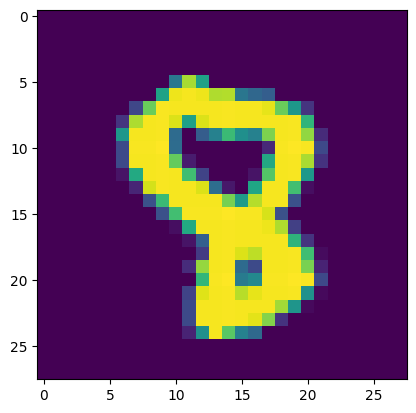

number of batches = 469
number of images = 60032


In [74]:
def data(dataset, batch, output="loader"):
    """Generate the data for training.

    Parameters
    ----------
     : str
        Name of the dataset to be used, which will be downloaded to data/

    batch : int
        Batch size

    output : str, default="loader"
        Controls the output. If 'loader' only outputs the training and validation
        data loaders. Otherwise, also outputs the training and validation datasets

    Returns
    -------
    train : torch.utils.data.dataloader.DataLoader
        Train DataLoader

    valid : torch.utils.data.dataloader.DataLoader
        Validation DataLoader

    train_dataset : torch.utils.data.Dataset, optional
        Train Dataset

    valid_dataset : torch.utils.data.Dataset, optional
        Validation Dataset

    """
    transform = transforms.Compose([transforms.ToTensor(),])
    
    Path("./data").mkdir(parents=True, exist_ok=True)
    if dataset == "MNIST":
        train_dataset = datasets.MNIST(root='./data', train=True, download=True,
                                    transform=transform)
        test_dataset = datasets.MNIST(root='./data', train=False, download=True, 
                                    transform=transform)
        
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch, shuffle=True) 
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch, shuffle=True) 
    
    if output == "loader":
        return train_loader, test_loader
    return (train_loader, test_loader), (train_dataset, test_dataset)


batch_size = 128
train_loader, test_loader = data(dataset="MNIST", batch=batch_size)


images, labels = next(iter(train_loader)) # A trick for getting a batch out of the dataloader object
plt.imshow(images[0].squeeze()) # Show the first image from the batch
plt.show()







print('number of batches = '+str(len(train_loader))) # Print num batches
print('number of images = '+str(len(train_loader)*batch_size)) # Print num images

In [80]:
# Select
images, labels = next(iter(train_loader))
indices = torch.tensor([], requires_grad=False, dtype=torch.int)
for target in labels.unique():
    indices = torch.cat((indices, (labels == target).nonzero(as_tuple=True)[0][0].reshape(1)), 0)
indices


tensor([17,  7,  4,  1,  2,  8, 11,  0, 12,  5])

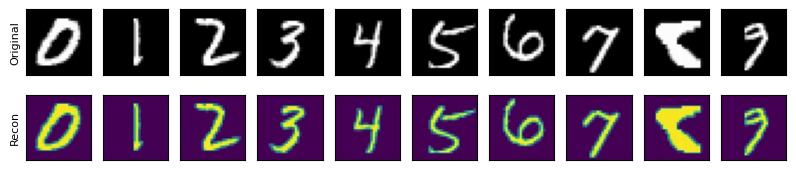

In [91]:
# Plot
matplotlib.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(2, len(labels.unique()), figsize=(8, 2))
for j, label in enumerate(labels.unique()):
    # Original
    ax[0, j].imshow(images[indices[j]].squeeze())
    ax[0, j].set_yticks([])
    ax[0, j].set_xticks([])
    
    # Recon
    ax[1, j].imshow(images[indices[j]].squeeze())
    ax[1, j].set_yticks([])
    ax[1, j].set_xticks([])
    
    if j == 0:
        ax[0, j].set_ylabel("Original")
        ax[1, j].set_ylabel("Recon")
fig.tight_layout()

In [96]:
import yaml

with open("./experiments/config.yaml") as f:
    hyperparameters = yaml.safe_load(f)
hyperparameters

{'model': {'activation': 'SiLU',
  'architecture': 'AE',
  'channels': 1,
  'features': [64, 128, 256],
  'groupnorm': 16,
  'latent': 4,
  'resnet': 1},
 'optimiser': {'betas': [0.9, 0.999]},
 'training': {'batch': 128, 'dataset': 'MNIST', 'epochs': 10, 'lr': '1e-3'},
 'wandb': {'logfreq': 1, 'plotfreq': 1}}

In [124]:
a = {}
for v in hyperparameters.values():
    a.update(v) 
a

{'activation': 'SiLU',
 'architecture': 'AE',
 'channels': 1,
 'features': [64, 128, 256],
 'groupnorm': 16,
 'latent': 4,
 'resnet': 1,
 'betas': [0.9, 0.999],
 'batch': 128,
 'dataset': 'MNIST',
 'epochs': 10,
 'lr': '1e-3',
 'logfreq': 1,
 'plotfreq': 1}

In [ ]:
dict(zip())

In [106]:
hyperparameters["model"]

{'activation': 'SiLU',
 'architecture': 'AE',
 'channels': 1,
 'features': [64, 128, 256],
 'groupnorm': 16,
 'latent': 4,
 'resnet': 1}